# Esercitazione 10
**7  Maggio 2024**

### Codice EquazioniNormali
Implementare la function  **eqnorm(A,b)** che implementa il metodo delle equazioni normali per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare 

In [78]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import SolveTriangular

In [79]:
# rango massimo e matrice ben condizionata
def eqnorm(A,b):
    G=A.T@A
    condG=np.linalg.cond(G)
    print('condG=',condG)
    f=A.T@b

    L=la.cholesky(G)

    z,flag=SolveTriangular.Lsolve(L,f)
    if flag==0:
        z,flag=SolveTriangular.Usolve(L.T,z)
                                      
    return z

### Codice QRLS
Implementare la function  **qrLS(A,b)** che utilizza il metodo QR per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

In [80]:
#rango massimo e matrice mal(mediamente boh che cazzo vuol dire porco dio) condizionata
def QRsolve(A,b):
    Q,R=la.qr(A,mode='economic') # mode = 'economic' to get a thin R matrix (m x n) !!NECESSARIO!!
    f=Q.T@b
    x,flag=SolveTriangular.Usolve(R,f)
    
    return x

### Codice SVDLS
Implementare la function  **svdLS(A,b)** che utilizza  il metodo SVD per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

In [81]:
#matrice molto mal condizionata => sta troia , il rango può anche essere non massimo 
def svdsolve(A,b):
    m,n=A.shape
    U,S,Vt=la.svd(A,full_matrices=False)
    V=Vt.T
    # creo la soglia per i valori singolari
    trash=np.spacing(1)*m*S[0]
    # confronto tutti i valori nel vettore sigma con la soglia, ottenendo così il rango della matrice
    k=np.count_nonzero(S>trash)
    # devo risolvere il sistema diagonale , Sc-d
    d=U.T@b
    d1=d[:k].reshape(k,1)
    s1=S[:].reshape(k,1)
    
    c=d1/s1

    # ORA calcolo l'effettiva soluzione 
    x=V[:,:k]@c
    residuo = np.linalg.norm(d[k:])**2
    return x,residuo

## Esercizio 1
- Si utilizzino i tre metodi implementati  per l'approssimazione ai minimi quadrati delle seguenti configurazioni di dati:

$$
\begin{array}{l}
x_1 = [-3.5, \, -3, \, -2, \, -1.5, \, -0.5, \, 0.5, \, 1.7, \, 2.5, \, 3] ;\\
y_1 = [-3.9, \, -4.8, \, -3.3, \, -2.5, \, 0.3, \, 1.8, \, 4, \, 6.9, \, 7.1] ;\\
x_2 = [-3.14, \, -2.4, \, -1.57, \, -0.7, \, -0.3, \, 0, \, 0.4, \, 0.7, \, 1.57] ;\\
y_2 = [0.02, \, -1, \, -0.9, \, -0.72, \, -0.2, \, -0.04, \, 0.65, \, 0.67, \, 1.1] ;\\
x_3 = [[1.001,\, 1.004,\, 1.005,\,1.0012, \,1.0013,  \, 1.0014,  \, 1.0015, \, 1.0016] ;\\
y_3 = [-1.2, \, -0.95, \, -0.9, \, -1.15, \, -1.1, \, -1] ;\\
\end{array}
$$

al variare del grado $n$ tra 1 e 4.



condG= 5.27297104169736
a_EQN= [[0.62222222]
 [1.86662412]]


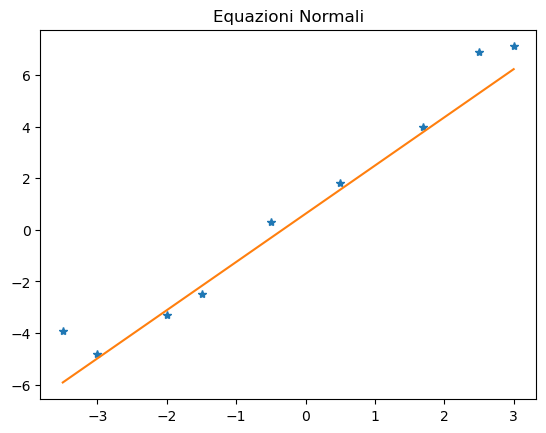

In [82]:
x = np.array([-3.5,  -3 , -2, -1.5, -0.5,  0.5,  1.7,  2.5, 3])
y = np.array([-3.9, -4.8, -3.3, -2.5,  0.3,  1.8,  4,  6.9,  7.1])
m=x.shape[0]
n=1
n1=n+1
A=np.vander(x,increasing=True)[:,:n1]

a_EQN=eqnorm(A,y)
print("a_EQN=",a_EQN)
xv=np.linspace(np.min(x),np.max(x),200)
pol_eqn=np.polyval(np.flip(a_EQN),xv) # flip because of the way np.polyval is defined , polyval vuole i coefficienti in ordine decrescente mentre noi li calciamo in ordine crescente
plt.plot(x,y,'*',xv,pol_eqn)
plt.title('Equazioni Normali')
plt.show()

res= [[0.16634043]
 [0.35240144]]


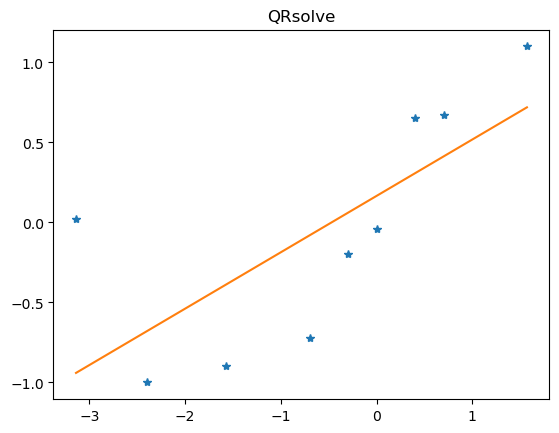

In [83]:

x_2 = np.array([-3.14,  -2.4,  -1.57, -0.7, -0.3, 0,  0.4,0.7,  1.57])
y_2 = np.array([0.02, -1, -0.9,  -0.72, -0.2, -0.04, 0.65, 0.67, 1.1])
m=x_2.shape[0]
n=1
n1=n+1
A_2=np.vander(x_2,increasing=True)[:,:n1]
res=QRsolve(A_2,y_2)
print("res=",res)
xv=np.linspace(np.min(x_2),np.max(x_2),200)
pol_eqn=np.polyval(np.flip(res),xv) 
plt.plot(x_2,y_2,'*',xv,pol_eqn)
plt.title('QRsolve')
plt.show()

res= [[1.21492318]
 [1.90511021]]


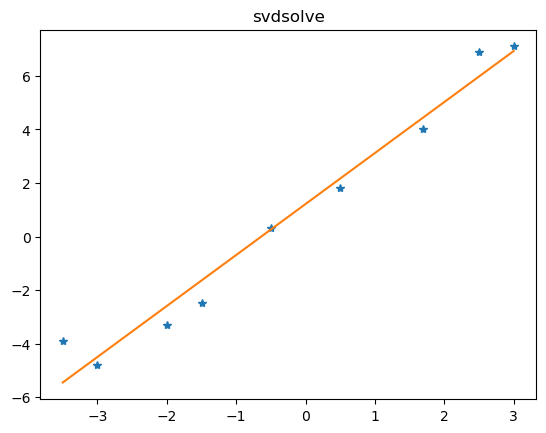

In [84]:
x_3 = np.array([1.001, 1.004, 1.005,1.0012,1.0013, 1.0014, 1.0015, 1.0016]) 
y_3 = np.array([-1.2, -0.95, -0.9, -1.15, -1.1, -1])
m=x_3.shape[0]
n=1
n1=n+1
A_3=np.vander(x,increasing=True)[:,:n1]
res,residuo=svdsolve(A_3,y)
print("res=",res)
xv=np.linspace(np.min(x),np.max(x),200)
pol_eqn=np.polyval(np.flip(res),xv)
plt.plot(x,y,'*',xv,pol_eqn)
plt.title('svdsolve')
plt.show()

## Esercizio 2: 
Per i dati $(x_i, y_i)$ riportati nei seguenti array

$$
\begin{array}{l}
x = [0.0004, \, 0.2507, \, 0.5008, \, 2.0007, \, 8.0013]  ;\\
y = [0.0007, \, 0.0162, \, 0.0288, \, 0.0309, \, 0.0310] ;
\end{array}
$$

- costruire la retta di regressione;
- costruire la parabola approssimante i dati nel senso dei minimi quadrati;

Quale tra le due approssimazioni risulta la migliore? (Confrontare i grafici e la norma euclidea al quadrato del vettore dei residui).



## Esercizio 3:
Scrivere uno script Python per approssimare la seguente configurazione di punti

$$
\begin{array}{l}
x = [10 \, : \, 0.5/5 \, : \, 10.5] ;\\
y = [11.0320, \, 11.1263, \, 11.1339, \, 11.1339, \, 11.1993, \, 11.1844] ;
\end{array}
$$

mediante un polinomio ai minimi quadrati di grado 4 costruito  con il metodo
delle equazioni normali, con il metodo QRLS e con il metodo SVDLS.
Perturbare poi il secondo punto nel seguente modo
$$x(1) = x(1) + 0.013; \quad y(1) = y(1) - 0.001;$$
e calcolare i polinomi ai minimi quadrati relativi alla
configurazione perturbata. Commentare e motivare i risultati ottenuti.



### Codici per l'interpolazione polinomiale nella forma di Lagrange 

Scrivere la function **interpL** che calcoli
il polinomio interpolante in forma di Lagrange  
Tale function deve assumere come dati in input:
 
 - x vettore dei nodi di interpolazione,
- y vettore dei valori della funzione nei nodi di interpolazione,
- xx vettore dei punti in cui si vuole valutare il polinomio interpolante.
 
In output deve essere restituito yy vettore contenente i valori assunti dal polinomio interpolante.

 
Funzioni Python  utili:
 
-  numpy.poly() restituisce i coefficienti di un polinomio di zeri assegnati,
 - numpy.polyval(p, x)  valuta un polinomio in un punto assegnato.
 

## Esercizio 1

Realizzare uno script che calcoli nella forma di Lagrange i polinomi che
interpolano le funzioni test $\sin(x)$ e $\cos(x)$ nei punti $x_k = k \pi/2$, con
$k = 0, 1, 2, 3, 4$. Visualizzare graficamente i polinomi ottenuti insieme
alle funzioni assegnate.

## Esercizio 2
Realizzare uno script python che interpola le coppie $x_i,y_i$, $i=0,\cdots,3$
dove $x_i,i=0,3$ sono punti equidistanti nell' intervallo [-1,1] e $y_i=f(x_i)$ dove $f(x)=3x^3+2x^2+2x-1$ 

## Esercizio 3

La temperatura $T$ in  prossimità  del suolo  subisce una variazione dipendente dalla latitudine $L$ nel seguente modo

L=np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65])

T=np.array([3.7, 3.7,3.52,3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52])


 
- Si vuole costruire un modello che descriva la legge $T = T(L)$ anche per latitudini non misurate. A tal fine si scriva uno script che fornisca la variazione di temperatura alle latitudini $L = \pm 42$ utilizzando il polinomio interpolante. Visualizzare in un grafico i dati assegnati, il polinomio interpolante e le stime di $T$ ottenute per $L = \pm 42$.


## Esercizio 4 

Scrivere uno script che calcoli il polinomio interpolante un insieme di punti $P_i =(x_i, y_i)$ $i = 0, ..., n $ nella forma di Lagrange con $x_i$ scelti dall'utente come:
    - punti equidistanti in un intervallo $[a, b]$,
    - punti definiti dai nodi di Chebyshev nell'intervallo $[a, b]$, ossia
$$
x_i = \frac{(a + b)}{2}+\frac{(b-a)}{2} \, \cos \left(
\frac{(2i+1)\pi}{2(n + 1)}
\right), \quad  i =0, ..., n 
$$
 
  e $y_i = f(x_i)$ ottenuti dalla valutazione nei punti $x_i$ di una funzione test   $f: \ [a, b] \rightarrow {\mathbb R}$. Testare lo script sulle funzioni
 
  - $f(x) = \sin(x)-2 \sin(2x)$,   $ \quad x \in [-\pi,\pi]$,
  -  $f(x) = \sinh(x)$, $ \quad  x \in [-2, 2]$,
  - $f(x) = |x|$,  $ \quad x \in [-1, 1]$,
  - $f(x) = 1/(1+25*x^2)$,  $ \quad x \in [-1, 1]$ (funzione di Runge).

Calcolare l'errore di interpolazione $r(x) = f(x)-p(x)$,
tra la funzione test $f(x)$ e il polinomio di interpolazione $p(x)$.
Visualizzare il grafico di $f(x)$ e $p(x)$, ed il grafico di
$|r(x)|$. Cosa si osserva? Cosa accade all'aumentare del grado $n$ di $p(x)$?
(Si costruisca una tabella che riporti i valori di $\|r(x)\|_{\infty}$ al variare di $n$).

## Esercizio 5

Per $n = 5, 10, 15, 20$ fornire un'approssimazione della costante di Lebesgue
scegliendo $x_1, x_2, ..., x_{n+1}$ equispaziati in $[-1, 1]$ oppure coincidenti con
i nodi di Chebyshev $x_i = \cos \left(\frac{(2i-1)\pi}{2(n + 1)}  \right)$, $i =1, ..., n + 1$.

## Esercizio 6

Si interpolino mediante il polinomio $p_{21}(x)$ i 22 punti $(x_i, y_i)$ con $x_i$ equispaziati in $[-1, 1]$ e $y_i = \sin(2 \pi x_i)$. Si considerino poi le ordinate $\tilde{y}_i = y_i + \varepsilon_i$, dove $\varepsilon_i$ denota l'$i$-esima componente del vettore $0.0002*np.random.random(22,)$, e si calcoli il corrispondente
polinomio interpolante $\tilde{p}_{21}(x)$. Si visualizzino e si commentino
i risultati ottenuti, calcolando anche l'errore relativo sul polinomio interpolante
e sui dati.


In [85]:
x=np.array([1,2])
p=np.poly(x)
print(p)

[ 1. -3.  2.]


In [86]:
def polinomioLagrange(x,j):
    x_j=np.zeros_like(x)
    n=x.size
    if j==0 :
        x_j=x[1:n]
    else :
        x_j=np.append(x[0:j],x[j+1:n])

    num = np.poly(x_j)
    den = np.polyval(num,x[j])

    # p = coefficente del polinomio di lagrange 
    p=num/den
    return p

In [87]:
def interpolazioneLagrange(x,y,xv):
    m=xv.size
    n=x.size
    L=np.zeros((m,n))
    for j in range(n):
        p=polinomioLagrange(x,j)
        L[:,j]=np.polyval(p,xv)
    return L@y

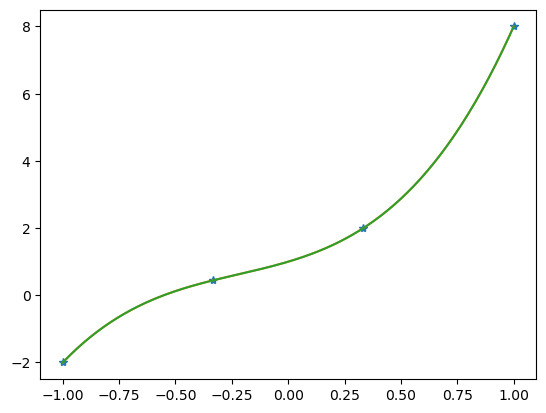

In [88]:
n=3
x=np.linspace(-1,1,n+1)
f = lambda x: 3*x**3 +2*x**2+ 2*x + 1
y=f(x)
xv=np.linspace(-1,1,200)
interpolazioneLagrange(x,y,xv)
# errore di interpolazione nullo dato che si sovrappongono le curve
# l'errore si annulla quando la funzione che genera i dati ha la derivata n+1-esima nulla
# formula => E(x^-)=f(x^-)-Pn(x^-)==> 1/(n+1)*w(n+1)*f^(n+1)(epsilon)
# w(n+1) = (x-x0)(x-x1)...(x-xn)
plt.plot(x,y,'*',xv,interpolazioneLagrange(x,y,xv),xv,f(xv))
plt.show()